In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot
from matplotlib import image
import time
# my module
import threshold
import morph_v2 as morph

In [3]:
def showAndSaveImg(img, saveName, isSave = 0):
    pyplot.imshow(img, cmap='gray')
    pyplot.axis('off')
    if (isSave) == 1:
        pyplot.savefig(saveName, bbox_inches='tight')
    pyplot.show()

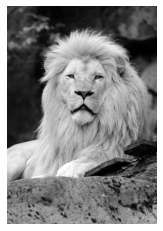

(800, 550)

In [4]:
lion_rgb = cv.imread('./Inputs/lion.png')
lion_gray = cv.cvtColor(lion_rgb, cv.COLOR_RGB2GRAY)
showAndSaveImg(lion_gray, './Images/gray.png')
lion_gray.shape

In [37]:
def diff_percent (img1, img2): 
    diff = np.zeros_like(img1)
    diff[img1 != img2] = 1
    unique, counts = np.unique(diff, return_counts=True)
    diff_dict = dict(zip(unique, counts))
    return 1 - diff_dict[0] / (img1.shape[0] * img1.shape[1])

In [19]:
basic_th = {}
basic_th_cv = {}
for i in [50, 80, 110, 140, 170, 200]:
    # my func
    time1 = time.time()
    basic_th[i] = threshold.basicThreshold(lion_gray, i)
    time2 = time.time()
    # cv2
    th, basic_th_cv[i] = cv.threshold(lion_gray, i, 255, cv.THRESH_BINARY)
    time3 = time.time()
    print('-----threshold =', i)
    print('diff', diff_percent(basic_th[i], basic_th_cv[i]))
    print('my func time', time2 - time1)
    print('cv time', time3 - time2)
    print((basic_th[i]).shape, (basic_th_cv[i]).shape)

-----threshold = 50
diff 0.0041045454545454545
my func time 0.007046699523925781
cv time 0.001783132553100586
(800, 550) (800, 550)
-----threshold = 80
diff 0.0027068181818181818
my func time 0.000804901123046875
cv time 0.003440380096435547
(800, 550) (800, 550)
-----threshold = 110
diff 0.004163636363636363
my func time 0.001790761947631836
cv time 0.0027456283569335938
(800, 550) (800, 550)
-----threshold = 140
diff 0.0055
my func time 0.0013859272003173828
cv time 0.0027811527252197266
(800, 550) (800, 550)
-----threshold = 170
diff 0.004375
my func time 0.0012903213500976562
cv time 0.001415252685546875
(800, 550) (800, 550)
-----threshold = 200
diff 0.003409090909090909
my func time 0.0015728473663330078
cv time 0.0013930797576904297
(800, 550) (800, 550)


In [24]:
mean_th = {}
mean_th_cv = {}
for size in [5, 15, 25]:
    for c in [4, 8, 15]:
        # my func
        time1 = time.time()
        mean_th[size, c] = threshold.meanAdaptiveThreshold(lion_gray, size, c)
        time2 = time.time()
        # cv2
        mean_th_cv[size, c] = cv.adaptiveThreshold(lion_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                                              cv.THRESH_BINARY, size, c)
        time3 = time.time()
        print('-----size, c =', size, c)
        print('diff', diff_percent(mean_th[size, c], mean_th_cv[size, c]))
        print('my func time', time2 - time1)
        print('cv time', time3 - time2)

-----size, c = 5 4
diff 0.01525
my func time 5.445227146148682
cv time 0.0006084442138671875
-----size, c = 5 8
diff 0.007565909090909091
my func time 5.360599040985107
cv time 0.0006144046783447266
-----size, c = 5 15
diff 0.002968181818181818
my func time 5.374064683914185
cv time 0.0006110668182373047
-----size, c = 15 4
diff 0.01610909090909091
my func time 6.079749822616577
cv time 0.0008182525634765625
-----size, c = 15 8
diff 0.009475
my func time 5.7520177364349365
cv time 0.0008170604705810547
-----size, c = 15 15
diff 0.004672727272727273
my func time 5.773382902145386
cv time 0.0008325576782226562
-----size, c = 25 4
diff 0.016186363636363638
my func time 6.059243202209473
cv time 0.0008826255798339844
-----size, c = 25 8
diff 0.011
my func time 5.981453895568848
cv time 0.0008807182312011719
-----size, c = 25 15
diff 0.006047727272727272
my func time 6.567585706710815
cv time 0.0008711814880371094


In [34]:
for i in [3, 5, 7]:
    kernel = np.ones((i,i),np.uint8)
    time1 = time.time()
    opening = morph.morph_filter(
        operator='er',
        img=basic_th[140],
        sel=kernel)
    time2 = time.time()
    opening_cv = cv.erode(basic_th[140],kernel,iterations = 1)
    time3 = time.time()
    print('i =', i)
    print('diff', diff_percent(opening, opening_cv))
    print('my func time', time2 - time1)
    print('cv time', time3 - time2)

i = 3
diff 0.0011954545454545456
my func time 4.78889012336731
cv time 0.0001418590545654297
i = 5
diff 0.0018363636363636364
my func time 5.839979410171509
cv time 0.00015473365783691406
i = 7
diff 0.002125
my func time 7.266108274459839
cv time 0.00017142295837402344


In [38]:
for i in [3, 5, 7]:
    kernel = np.ones((i,i),np.uint8)
    time1 = time.time()
    di = morph.morph_filter(
        operator='di',
        img=basic_th[140],
        sel=kernel)
    print(di.shape)
    time2 = time.time()
    di_cv = cv.dilate(basic_th[140],kernel,iterations = 1)
    print(di_cv.shape)
    time3 = time.time()
    print('i =', i)
    print('diff', diff_percent(di, di_cv))
    print('my func time', time2 - time1)
    print('cv time', time3 - time2)

(800, 550)
(800, 550)
i = 3
diff 0.0
my func time 4.357997417449951
cv time 0.00038814544677734375
(800, 550)
(800, 550)
i = 5
diff 0.0
my func time 5.268198251724243
cv time 0.0003898143768310547
(800, 550)
(800, 550)
i = 7
diff 0.0
my func time 6.144763469696045
cv time 0.00023984909057617188
